In [1]:
# project: p1
# submitter: hbian8
# partner: none
# hours: 4

In [2]:
#q1
type(7/2)

float

In [3]:
#q2
x = 4
maximum = 10
minimum = 5
error = x < minimum or x >  maximum# True if x is outside the minimum-to-maximum range
error

True

In [4]:
#q3
word = "KAFKAESQUE"
suffix_match = str.lower(word[len(word)-5:]) == ("esque") # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [5]:
def add(a, b=1):
    return a+b



In [6]:
#q4
add(3,4)

7

In [7]:
#q5
add(9)

10

In [8]:
#q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [9]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)
    
def smart_count(nums):
    sum = 0
    for num in nums:
        if num > 10:
            continue
        if num < 0:
            break
        sum += num
    return sum


3
4
1
6


In [10]:
#q7
smart_count(nums)

14

In [11]:
#q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [12]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [13]:
#q9
coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [14]:
#q10
rows[0][-1]["x"]

8

In [15]:
#q11
import copy
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#q12
sum = 0
for row in rows:
    sum += row[header.index("B")]
sum

10007

In [17]:
#q13
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [18]:
f = open("usd.json")
data = f.read()
f.close()
print(type(data))
print(data[:300] + "...")

<class 'str'>
{"eur":{"code":"EUR","alphaCode":"EUR","numericCode":"978","name":"Euro","rate":0.87247211399168,"date":"Sun, 6 Feb 2022 23:55:01 GMT","inverseRate":1.1461684378941},"gbp":{"code":"GBP","alphaCode":"GBP","numericCode":"826","name":"U.K. Pound Sterling","rate":0.73726210930731,"date":"Sun, 6 Feb 2022...


In [19]:
#q14
import json
f = open("usd.json")
data = json.load(f)
f.close()
400 * data["eur"]["rate"]

348.988845596672

In [20]:
def divide(a, b):
    try:
        return a / b
    except ZeroDivisionError as err:
        return float("nan")

In [21]:
#q15
divide(3, 2)

1.5

In [22]:
#q16
divide(-3, 0)

nan

In [23]:
import os
import pandas
years = {}
path = "./home-computers/"
listdir = os.listdir(path)
#int(listdir[1][listdir[1].index(".")-4:listdir[1].index(".")])
# for row in listdir:   
#     years[int(row[row.index(".")-4:row.index(".")])] = pandas.read_csv(path+row, skiprows = [0,0]).set_index("Geographic Area Name")
years = {int(row[row.index(".")-4:row.index(".")]): \
         pandas.read_csv(path+row, skiprows = [0,0]).set_index("Geographic Area Name") for row in listdir}
# years[2017]

In [24]:
#q17
keys = [year for year in years]
keys

[2018, 2017, 2015, 2014, 2016, 2013]

In [25]:
#q18
years[2018].loc["Wisconsin", "Estimate!!Total"]

2371960

In [26]:
#q19
years[2018]["Estimate!!Total!!No Computer"].sum()

10285814

In [27]:
#q20
(years[2018]["Margin of Error!!Total!!No Computer"] / years[2018]["Estimate!!Total!!No Computer"]).max()

0.12375641594322287

In [28]:
#q21
noComputer = {}
states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
for state in states:
    noComputer[state] = years[2018].loc[state, "Estimate!!Total!!No Computer"] / \
    years[2018].loc[state, "Estimate!!Total"] * 100
noComputer

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

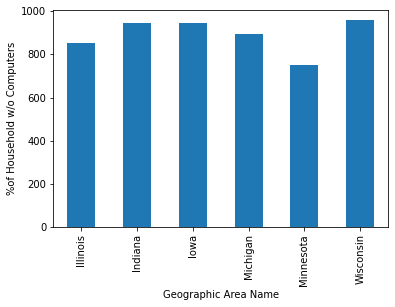

In [29]:
#q22
#x="Geographic Area Name", y="%of Household w/o Computers"
plot = (pandas.Series(noComputer)*100).plot.bar()
plot.set_xlabel("Geographic Area Name")
plot.set_ylabel("%of Household w/o Computers")
None

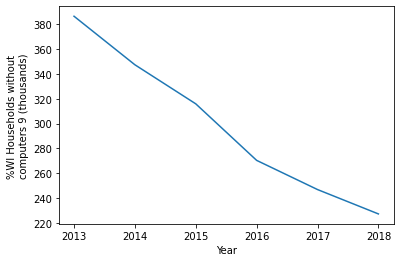

In [30]:
#q23
# years_WI = {year : years[year].loc["Wisconsin", "Estimate!!Total!!No Computer"] for year in years}
years_WI = {}
year_ordered = [year for year in years]
year_ordered.sort()
for year in year_ordered:
    years_WI[year] = years[year].loc["Wisconsin", "Estimate!!Total!!No Computer"] 
lineplot = (pandas.Series(years_WI)/1000).plot.line()
lineplot.set_xlabel("Year")
lineplot.set_ylabel("%WI Households without \ncomputers 9 (thousands)")
None

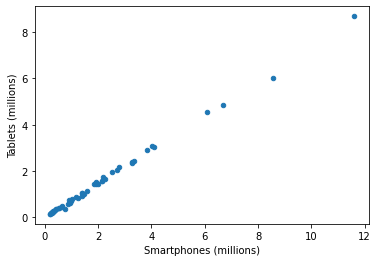

In [31]:
#q24
smartphones = pandas.Series(years[2018]["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"])
tablets= pandas.Series(years[2018]["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"])
relation = []
for smartphone, tablet in zip(smartphones, tablets):
#     print(smartphone, tablet)
    relation.append([smartphone, tablet])
# relation.plot.scatter(x = "Smartphones (millions)", y = "Tablets (millions)")
relation = pandas.DataFrame(relation, columns=['Smartphones (millions)', 'Tablets (millions)'])/(1e6)
relation.plot.scatter(x = "Smartphones (millions)", y = "Tablets (millions)")
None

In [32]:
#q25
import subprocess
output = subprocess.check_output(["git", "log"], cwd="./flask")
lines = output.decode('utf-8').split("\n")
line = lines[0]
line

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [33]:
#q26
commits = []
for line in lines:
    if line[0:6] == "commit":
        commits.append(line.split(" ")[1])
commits[len(commits)-50:len(commits)]

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [34]:
#q27
subprocess.check_output(["git", "checkout", commits[len(commits)-4]], cwd="./flask")
f = open("./flask/README")
f.read()

Previous HEAD position was 660994ef Merge branch '2.0.x'
HEAD is now at 44b42e0f Added a README file for MiniTwit.


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [35]:
#q28
subprocess.check_output(["git", "checkout", "origin"], cwd="./flask")
authors = {}
for line in lines:
    if "Merge pull request" in line:
        words = line.split(" ")
        for word in words:
            if "/" in word:
                name = word.split("/")[0]
                if name not in authors:
                    authors[name] = 1
                else:
                    authors[name] += 1
authors

Previous HEAD position was 44b42e0f Added a README file for MiniTwit.
HEAD is now at 660994ef Merge branch '2.0.x'


{'Yourun-proger': 2,
 'olliemath': 1,
 'pallets': 204,
 'jugmac00': 1,
 'pgjones': 14,
 'eprigorodov': 1,
 'HenryKobin': 1,
 'delicb': 1,
 'vinzid': 1,
 'karintou8710': 1,
 'kkirsche': 2,
 'matipau': 1,
 'Makonede': 1,
 'sprutner': 1,
 'Jalkhov': 1,
 'KPLauritzen': 1,
 'greyli': 42,
 'esadek': 1,
 'na2shell': 1,
 'Rohan-Salwan': 1,
 'default-303': 1,
 'awijaya22': 1,
 'starlightknown': 1,
 'yuxiaoy1': 4,
 'kaushikk25': 1,
 'Elahi-cs': 1,
 'Hugo0': 1,
 'dannysepler': 1,
 'rafaVls': 1,
 'brettlangdon': 1,
 'oleksis': 1,
 'andrewjroth': 1,
 'ThiefMaster': 11,
 'kangetsu121': 1,
 'mbpreble': 1,
 'tonydelanuez': 1,
 'elliott-king': 1,
 'huimingz': 1,
 'lielfr': 1,
 'tirkarthi': 3,
 'nphilipp': 1,
 'WolframAlph': 1,
 'MLH-Fellowship': 2,
 'MartinThoma': 1,
 'ebonnecab': 1,
 'jackwardell': 3,
 'jab': 3,
 'DeepOde': 1,
 'stat1c-void': 1,
 'lgiordani': 1,
 'iomintz': 1,
 'jeffwidman': 8,
 'kx-chen': 1,
 'jeenuv': 1,
 'pgkrit': 1,
 'valleygtc': 1,
 'shanavas786': 1,
 'mattc41190': 2,
 'gnumoksha

In [36]:
#q29
try:
    subprocess.check_output(["pip3", "instal"], stderr=subprocess.PIPE, encoding = "utf-8")
except subprocess.CalledProcessError as e:
    output = e.stderr
output

'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [37]:
import numpy as np
def rand_df(rows):
    return pandas.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])
times_df = pandas.DataFrame(dtype=float)

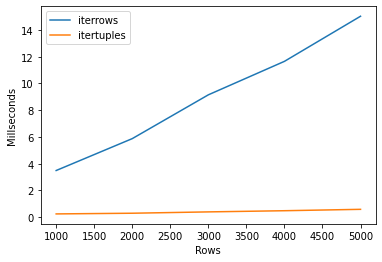

In [38]:
#q30
import time
import pandas as pd
rows = [1000, 2000, 3000, 4000, 5000]
for row in rows:
    time1 = time.time()
    for eachrow in rand_df(row).iterrows():
        pass
    time2 = time.time()
    times_df.at[row, "iterrows"] = (time2 - time1)*100
    time1 = time.time()
    for eachrow in rand_df(row).itertuples():
        pass
    time2 = time.time()
    times_df.at[row, "itertuples"] = (time2 - time1)*100
loopplot = times_df.plot.line()
loopplot.set_xlabel("Rows")
loopplot.set_ylabel("Millseconds")
None

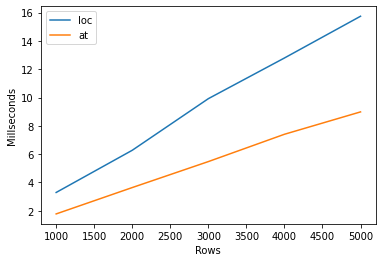

In [39]:
#q31
search_times_df = pandas.DataFrame(dtype=float)
for row in rows:
    df = rand_df(row)
    time1 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    time2 = time.time()
    search_times_df.at[row, "loc"] = (time2 - time1)*100
    time1 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    time2 = time.time()
    search_times_df.at[row, "at"] = (time2 - time1)*100
searchplot = search_times_df.plot.line()
searchplot.set_xlabel("Rows")
searchplot.set_ylabel("Millseconds")
None

In [40]:
def laugh(x):
    return "ha" * x

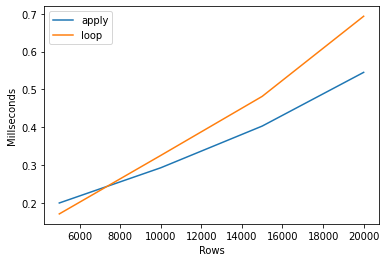

In [41]:
#q32
rows = [5000, 10000, 15000, 20000]
apply_times_df = pandas.DataFrame(dtype=float)
for row in rows:
    df = rand_df(row)
    time1 = time.time()
    result = df["A"].apply(laugh).tolist()
    time2 = time.time()
    apply_times_df.at[row, "apply"] = (time2 - time1)*100
    time1 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    time2 = time.time()
    apply_times_df.at[row, "loop"] = (time2 - time1)*100
applyplot = apply_times_df.plot.line()
applyplot.set_xlabel("Rows")
applyplot.set_ylabel("Millseconds")
None